# ANN Solution

**Importing required library**

In [1]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,  classification_report
from sklearn.preprocessing import StandardScaler

**Importing the dataset**

In [2]:
# Read Input file from Desktop using File Library of Google collab.
Inp_data = files.upload()

Saving advertising.csv to advertising.csv


Read csv data uding panda's library

In [3]:
# Get into Data frames from file
Data = pd.read_csv('advertising.csv')

Check header of data

In [4]:
Data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0


Replace space in header of column with '_'

In [5]:
Data.columns = Data.columns.str.replace(' ', '_')

In [6]:
#Display Header of Data
Data.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked_on_Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0


**Exploratory Data Analysis**

In [7]:
# Check distribution of output variable
Data.Clicked_on_Ad.value_counts()

1    500
0    500
Name: Clicked_on_Ad, dtype: int64

In [8]:
# Printing data details
print(Data.info()) # for a quick view of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily_Time_Spent_on_Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area_Income               1000 non-null   float64
 3   Daily_Internet_Usage      1000 non-null   float64
 4   Ad_Topic_Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked_on_Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB
None


In [9]:
# Check the size of Data
Data.describe()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Clicked_on_Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [10]:
# Check if our data has any null values 
Data.isnull().any()

Daily_Time_Spent_on_Site    False
Age                         False
Area_Income                 False
Daily_Internet_Usage        False
Ad_Topic_Line               False
City                        False
Male                        False
Country                     False
Timestamp                   False
Clicked_on_Ad               False
dtype: bool

There is no missing values in provided data set

We have checked data type of dataset

In [11]:
# Cecking out the data types for each of our variables. We want to get a sense of whether or not data is numerical (int64, float64) or not (object). 
Data.dtypes

Daily_Time_Spent_on_Site    float64
Age                           int64
Area_Income                 float64
Daily_Internet_Usage        float64
Ad_Topic_Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked_on_Ad                 int64
dtype: object

We have checked the data size( Rows and columns)

In [12]:
print ("Number of observations :: ", len(Data.index))
print ("Number of columns :: ", len(Data.columns))

Number of observations ::  1000
Number of columns ::  10


**Box Plot**

We have created box plot of indepent feature with respect to dependent feature with each output type

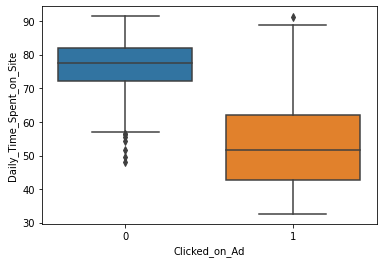

In [13]:
sns.boxplot(y='Daily_Time_Spent_on_Site', x='Clicked_on_Ad', data=Data)

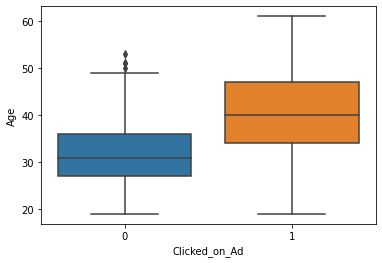

In [14]:
sns.boxplot(y='Age', x='Clicked_on_Ad', data=Data)

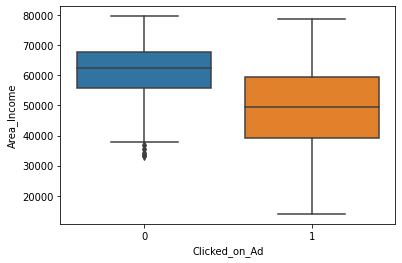

In [15]:
sns.boxplot(y='Area_Income', x='Clicked_on_Ad', data=Data)

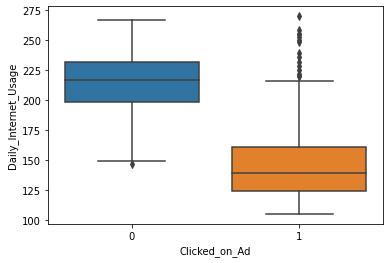

In [16]:
sns.boxplot(y='Daily_Internet_Usage', x='Clicked_on_Ad', data=Data)

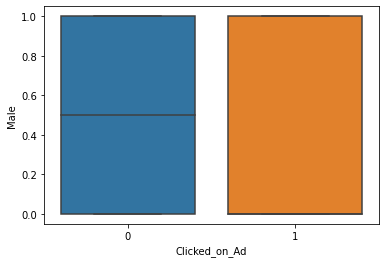

In [17]:
sns.boxplot(y='Male', x='Clicked_on_Ad', data=Data)

To  further analyze our data, let's first plot a histogram with Kernel density estimation for the 'Age' variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


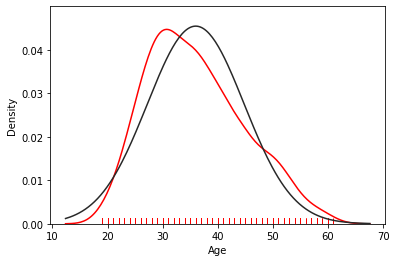

In [18]:
from scipy.stats import norm
sns.distplot(Data['Age'],hist=False, color='r', rug=True, fit=norm)

It can be concluded that the variable 'Age' has a normal distribution of data

Plot bar chart of age to check the distribution

Text(0.5, 0, 'Age')

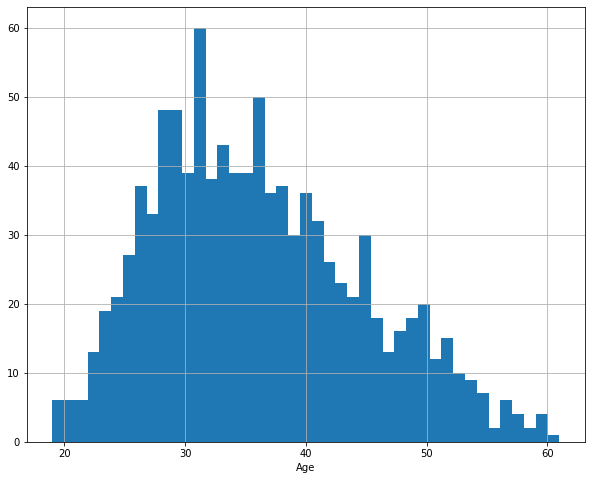

In [19]:
plt.figure(figsize=(10, 8))
Data.Age.hist(bins=Data.Age.nunique())
plt.xlabel('Age')

Plot scatter plot to check the distribution

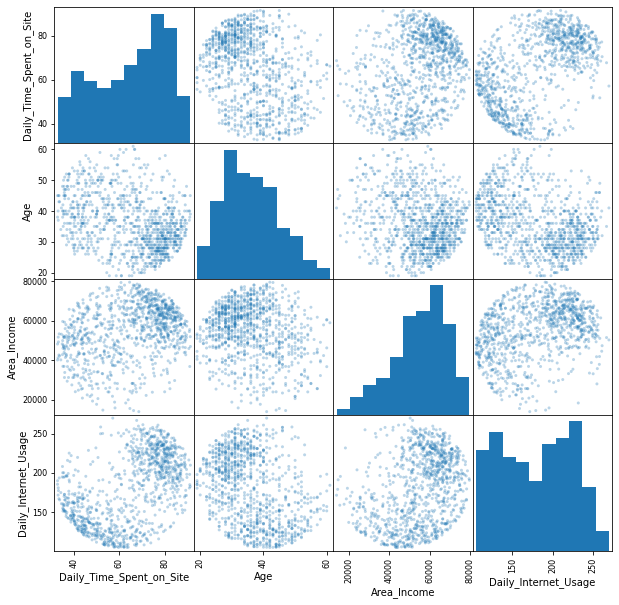

In [20]:
from pandas.plotting import scatter_matrix  
scatter_matrix(Data[['Daily_Time_Spent_on_Site', 'Age','Area_Income', 'Daily_Internet_Usage']],  
 alpha=0.3, figsize=(10,10));

**Data Preprocessing**

Based on correlation calculated we have created Heat map for the features

In [21]:
Coor_mat = Data.corr()

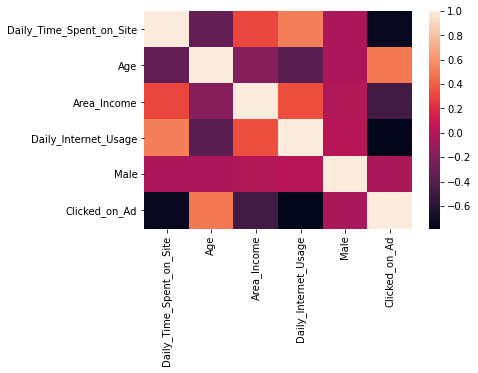

In [22]:
sns.heatmap(Coor_mat)

In [23]:
object_variables = ['Ad_Topic_Line', 'City', 'Country']  
Data[object_variables].describe(include=['O'])  

,Ad_Topic_Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Grass-roots multimedia policy,Lisamouth,Czech Republic
freq,1,3,9


From Above we can conclude that each Ad topic is unique and 969 unique cities and total 237 unique Countries are there

We will check the frequency of country in data set

In [24]:
pd.crosstab(index=Data['Country'], columns='count').sort_values(['count'], ascending=False).head(20) 

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


From above we can say that there in no single country is dominate in data set

We will drop Ad topic line , City and Country 

In [25]:
Data = Data.drop(['Ad_Topic_Line', 'City', 'Country'], axis=1)  

Convert timestamo into Date time 

In [26]:
Data['Timestamp'] = pd.to_datetime(Data['Timestamp'])


We will convert time stamp into Day , Month and Time for better understanding of data

In [27]:
Data['Month'] = Data['Timestamp'].dt.month
Data['Day of month'] = Data['Timestamp'].dt.day
Data['Day of week'] = Data['Timestamp'].dt.dayofweek
Data['Hour'] = Data['Timestamp'].dt.hour  

In [28]:
# Preview Data after new coulmn addition
Data.head()  

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Timestamp,Clicked_on_Ad,Month,Day of month,Day of week,Hour
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:00,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:00,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:00,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,2016-10-01 02:31:00,0,10,1,5,2
4,68.37,35,73889.99,225.58,0,2016-03-06 03:36:00,0,3,6,6,3


In [29]:
# We will drop timestamp as we have all the required data 
Data = Data.drop(['Timestamp'], axis=1)

Data.head()  

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Clicked_on_Ad,Month,Day of month,Day of week,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,10,1,5,2
4,68.37,35,73889.99,225.58,0,0,3,6,6,3


**Train and Test Data**

In [30]:
Data.columns

Index(['Daily_Time_Spent_on_Site', 'Age', 'Area_Income',
       'Daily_Internet_Usage', 'Male', 'Clicked_on_Ad', 'Month',
       'Day of month', 'Day of week', 'Hour'],
      dtype='object')

In [31]:
from sklearn.model_selection import train_test_split

X = Data[['Daily_Time_Spent_on_Site', 'Age', 'Area_Income', 'Daily_Internet_Usage',  
    'Male', 'Month', 'Day of month' ,'Day of week']]

In [32]:
y = Data['Clicked_on_Ad']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [34]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

**Model Development and Fitting Procedures**

Importing the Keras libraries and packages

In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import optimizers

Initializing the ANN…

In [36]:
classifier = Sequential()

Adding the input layer and the first hidden layer…

Below are few assumption for model

1.   For output Dim we have used approx avg of input+ output variable i.e (8+1)/2 = 5
2.   Init will initialize the Hidden Layer weights uniformly
3.   Activation Function is Rectifier Activation Function(Relu)



In [37]:
classifier.add(Dense(5, input_dim = X_train.shape[1] , activation = 'relu'))

Add second hidden layer

In [38]:
classifier.add(Dense(5, activation = 'relu'))

Adding the output layer


*   For output we are using sigmoid funtion as output variable is binary



In [39]:
classifier.add(Dense(1, activation = 'sigmoid'))

In [40]:
sgd = optimizers.Adam(lr = 0.001)

Compiling the ANN

In [41]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [42]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 45        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


Fitting the ANN to the Training set

In [98]:
history= classifier.fit(X_train,y_train, epochs= 40, batch_size=250, validation_data=(X_test, y_test))

Epoch 1/40
3/3 [==============================] - 0s 60ms/step - loss: 0.6897 - accuracy: 0.5597 - val_loss: 0.8078 - val_accuracy: 0.5000
Epoch 2/40
3/3 [==============================] - 0s 24ms/step - loss: 0.6524 - accuracy: 0.6269 - val_loss: 0.5753 - val_accuracy: 0.6939
Epoch 3/40
3/3 [==============================] - 0s 25ms/step - loss: 0.5852 - accuracy: 0.6896 - val_loss: 0.6847 - val_accuracy: 0.5424
Epoch 4/40
3/3 [==============================] - 0s 24ms/step - loss: 0.6753 - accuracy: 0.5582 - val_loss: 0.5665 - val_accuracy: 0.7152
Epoch 5/40
3/3 [==============================] - 0s 26ms/step - loss: 0.5847 - accuracy: 0.6627 - val_loss: 0.6242 - val_accuracy: 0.6152
Epoch 6/40
3/3 [==============================] - 0s 29ms/step - loss: 0.6327 - accuracy: 0.6149 - val_loss: 0.5556 - val_accuracy: 0.7424
Epoch 7/40
3/3 [==============================] - 0s 27ms/step - loss: 0.6400 - accuracy: 0.6090 - val_loss: 0.5236 - val_accuracy: 0.8121
Epoch 8/40
3/3 [===========

Predicting the Test set results

In [99]:
y_pred = classifier.predict(X_test)

In [100]:
y_pred = (y_pred > 0.5)

Making the Confusion Matrix

In [101]:
cnf_matrix = confusion_matrix (y_test, y_pred)
print(cnf_matrix)

[[137  42]
 [ 22 129]]


Check accuracy score of Model

In [102]:
print(accuracy_score(y_test, y_pred))

0.806060606060606


# KNN Solution

In [103]:
# Read Input file from Desktop using File Library of Google collab.
Inp_data = files.upload()

Saving parkinsons.csv to parkinsons.csv


In [104]:
# Get into Data frames from file
Data = pd.read_csv('parkinsons.csv')

In [105]:
Data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [106]:
Data.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [107]:
# Lets see the data descriptive statistics properties
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


We will start with the univariate analysis first

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


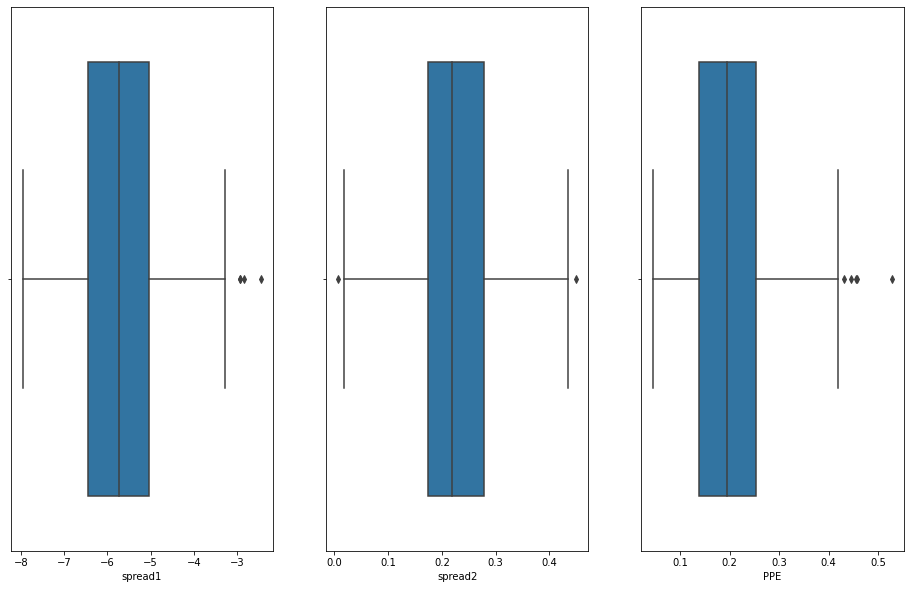

In [108]:
# We will start with the univariate analysis first
fig, ax = plt.subplots(1,3,figsize=(16,10)) 
sns.boxplot(x='spread1',data=Data, ax=ax[0],orient='v') 
sns.boxplot(x='spread2',data=Data, ax=ax[1],orient='v')
sns.boxplot(x='PPE',data=Data,ax=ax[2],orient='v')

Observations:The above figure shows the box plot of the frequency variation. 
All the three variations have outliers.

Generally speaking, decision trees are able to handle outliers.It is very unlikely that decision tree will create a leaf to isolate them

In [109]:
# dropping name column as this column is not much significant 
data = Data.drop('name',axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

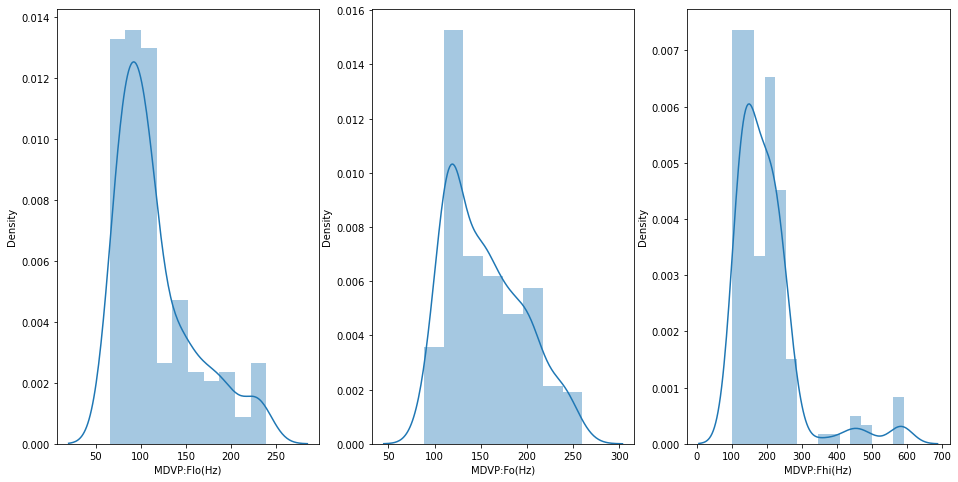

In [110]:
fig, ax = plt.subplots(1,3,figsize=(16,8)) 
sns.distplot(Data['MDVP:Flo(Hz)'],ax=ax[0]) 
sns.distplot(Data['MDVP:Fo(Hz)'],ax=ax[1]) 
sns.distplot(Data['MDVP:Fhi(Hz)'],ax=ax[2])

The measures of vocal fundamental frequency are shown above. There is a positive skewness for minimum vocal fundemental frequency with more high values between 75Hz and 125Hhz. The average vocal frequency is almost normally distributed with more values ranging 115Hz and 130Hz. The high vocal frequency does not have any skewness, but some range of values are at the right most tail.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


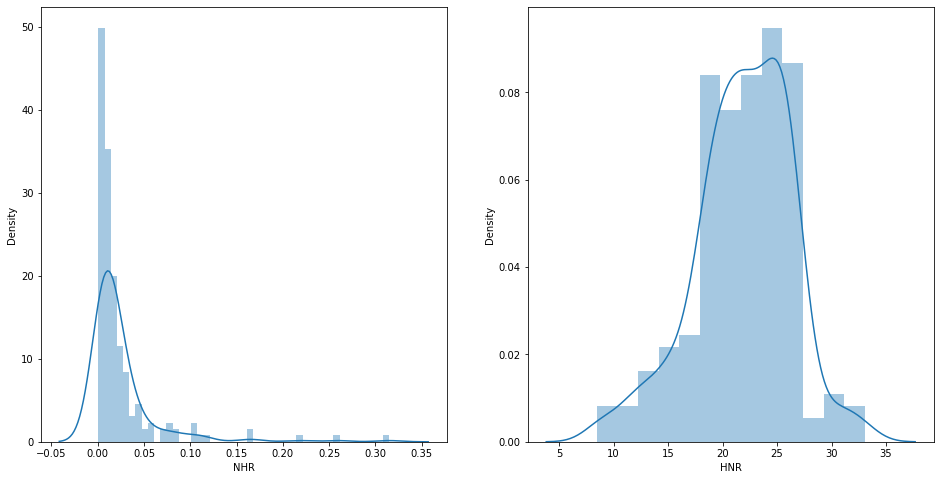

In [111]:
fig, ax = plt.subplots(1,2,figsize=(16,8)) 
sns.distplot(Data['NHR'],ax=ax[0]) 
sns.distplot(Data['HNR'],ax=ax[1])

The measure of tonal component of frequency is shown above. The value NHR is right skewed for there are so many observations in the area, but they seem to be with very minimal values. The maximum number of observations is between 0 and 0.04. The value HNR looks like normally distributed, but in a first look there seems to be a slight negative skewness

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

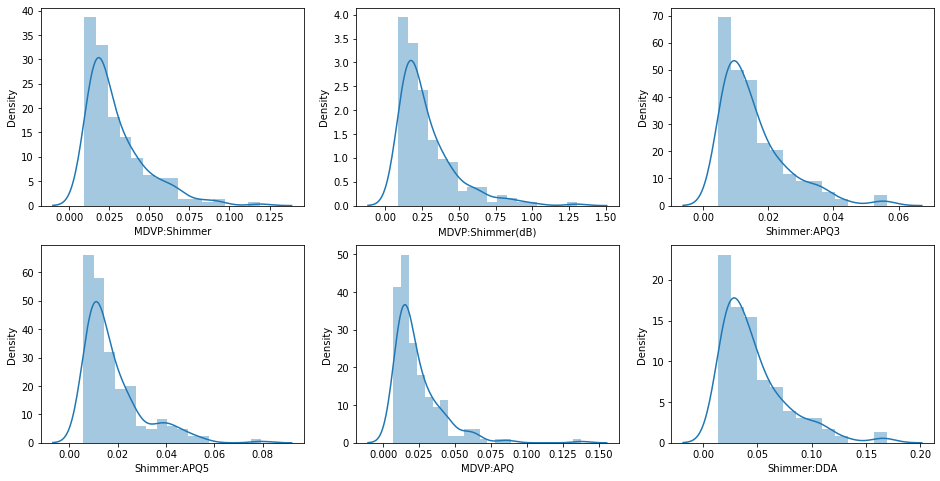

In [112]:
fig, ax = plt.subplots(2,3,figsize=(16,8)) 
sns.distplot(Data['MDVP:Shimmer'],ax=ax[0,0]) 
sns.distplot(Data['MDVP:Shimmer(dB)'],ax=ax[0,1]) 
sns.distplot(Data['Shimmer:APQ3'],ax=ax[0,2]) 
sns.distplot(Data['Shimmer:APQ5'],ax=ax[1,0]) 
sns.distplot(Data['MDVP:APQ'],ax=ax[1,1]) 
sns.distplot(Data['Shimmer:DDA'],ax=ax[1,2])

For all of the above graphs, we can observe that the measure of variation in amplitude is positively skewed

**Bi -Variate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


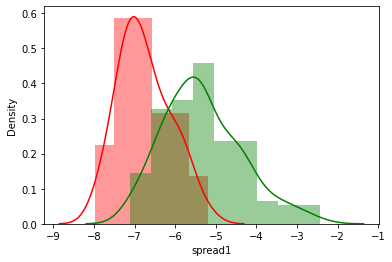

In [113]:
sns.distplot( data[Data.status == 0]['spread1'], color = 'r')
sns.distplot( data[Data.status == 1]['spread1'], color = 'g')

Spread1 is normally distributed between person who have PD and who is normal. People who have spread1 between - 8.5 and -7.5 are more and they are normal. People whose spread1 is between -6.5 and -5 are having PD

 **Correlation comparision with heat map**

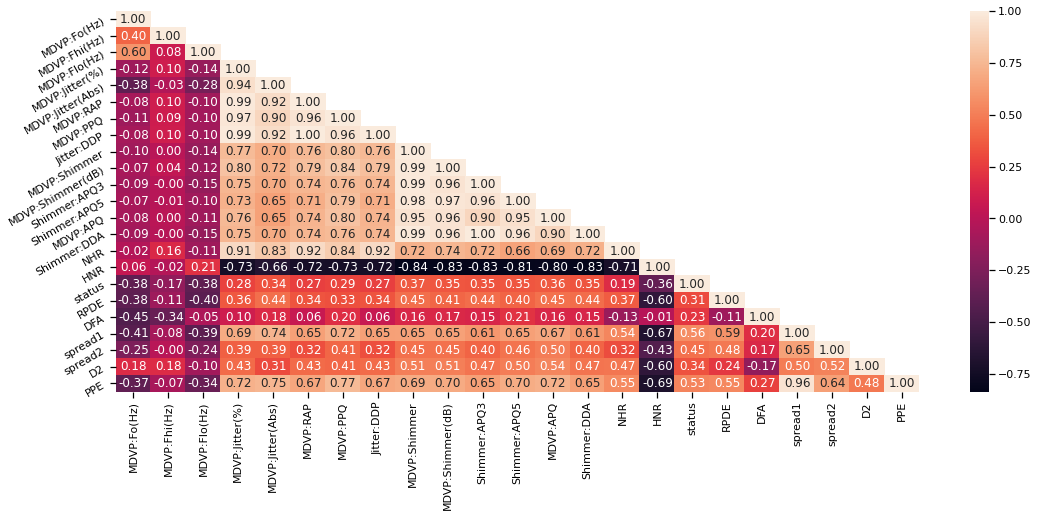

In [114]:
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(18,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Observations:

1. MDVP:Jitter(%) has a very high correlation with MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP
2. MDVP:Shimmer has a very correlation with MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA this may be because they are related to each other. This may be because multi-dimensinal voice programs analysis is closely related with these variables
3. Target Variable Status is having kind of low to moderate correlation with the all dependent variable which in turn means we should ideally not drop any of the dependent variable for now

**Lets start with the KNN modeling**

In [115]:
dataForKNN = Data

In [116]:
dataForKNN = dataForKNN.drop(['name','status'], axis=1)

In [117]:
from sklearn.neighbors import KNeighborsClassifier

Execution of model with 3 neighbors

In [118]:
model = KNeighborsClassifier(n_neighbors=3)

In [119]:
X=dataForKNN

In [120]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [121]:
Y= Data[{'status'}]

In [122]:
Y

,status
0,1
1,1
2,1
3,1
4,1
...,...
190,0
191,0
192,0
193,0


In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1)

In [124]:
# Train the model using the training sets
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [125]:
y_predicted = model.predict(X_test)

In [126]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predicted)

0.85

Lets test for 4 neighbors

In [127]:
k_model = KNeighborsClassifier(n_neighbors=4)
k_model.fit(X_train, y_train)
k_model.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.85

Lets test for 5 Neighbors

In [128]:
k_model = KNeighborsClassifier(n_neighbors=4)
k_model.fit(X_train, y_train)
k_model.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.85

Since after selecting neighbors as 4 and 5 we do not have any change in the accuracy hence we stop testing after the same and since we get maximum accuracy for neighbors 3 we conclude that we will selected the KNN model with neighbors = 3

As next step we can test the data on other models such as Random Forest Classifier or Decision tree. In addition we can also see for techniques such as PCA to boost the performance of the model